In [1]:
# Import all the required tools
import os
from os import listdir
import keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, add, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Load datasets
Train_data = '/kaggle/input/dogs-cats-images/dataset/training_set/'
Test_data = '/kaggle/input/dogs-cats-images/dataset/test_set/'

In [3]:
# Understand the data
cats_in_trainset = os.path.join(Train_data, "cats")
dogs_in_trainset = os.path.join(Train_data, "dogs")
cats_in_testset = os.path.join(Test_data,"cats")
dogs_in_testset = os.path.join(Test_data,"dogs")


In [4]:
# Visualize training and testing 
print("Training data:  dogs = " + str(len(os.listdir(dogs_in_trainset)))+ "," + "cats = " + str(len(os.listdir(cats_in_trainset))))
print("Testing data:   dogs = " + str(len(os.listdir(dogs_in_testset)))+ "," + "cats = " + str(len(os.listdir(cats_in_testset))))


Training data:  dogs = 4000,cats = 4000
Testing data:   dogs = 1000,cats = 1000


In [5]:
batch_size = 256
No_epoch = 30
image_size = 200

In [6]:
data_generator = ImageDataGenerator(rescale=1./255)

In [7]:
train_it = data_generator.flow_from_directory(batch_size=batch_size,
                                              directory=Train_data,
                                              shuffle=True,
                                              target_size=(image_size, image_size),
                                              class_mode="binary")
test_it = data_generator.flow_from_directory(batch_size=batch_size,
                                             directory=Test_data,
                                             shuffle=True,
                                             target_size=(image_size, image_size),
                                             class_mode="binary")

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


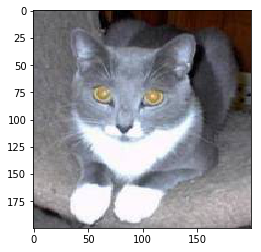

In [8]:
images, lbels = next(train_it)
for i in range(1):
    img = images[i]
    plt.imshow(img)
    plt.show()


In [9]:
def class_model():
    model = Sequential()
    model.add(Conv2D(32, 3, padding="same",input_shape=(image_size, image_size ,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
      
    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(128, (3,3), padding= "same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
      
    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation("relu"))
    model.add(Dense(1))
    model.add(Activation("sigmoid"))
    
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [10]:
model = class_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        3

In [11]:
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
         validation_data=test_it, validation_steps=len(test_it), epochs= No_epoch, verbose=1)

Train for 32 steps, validate for 8 steps
Epoch 1/30
32/32 [==============================] - 55s 2s/step - loss: 0.6905 - accuracy: 0.5145 - val_loss: 0.7065 - val_accuracy: 0.5100
Epoch 2/30
32/32 [==============================] - 36s 1s/step - loss: 0.6681 - accuracy: 0.5780 - val_loss: 0.6373 - val_accuracy: 0.6150
Epoch 3/30
32/32 [==============================] - 37s 1s/step - loss: 0.6298 - accuracy: 0.6311 - val_loss: 0.6629 - val_accuracy: 0.5785
Epoch 4/30
32/32 [==============================] - 37s 1s/step - loss: 0.5940 - accuracy: 0.6737 - val_loss: 0.5589 - val_accuracy: 0.7075
Epoch 5/30
32/32 [==============================] - 36s 1s/step - loss: 0.5541 - accuracy: 0.7201 - val_loss: 0.5219 - val_accuracy: 0.7325
Epoch 6/30
32/32 [==============================] - 36s 1s/step - loss: 0.5114 - accuracy: 0.7471 - val_loss: 0.4896 - val_accuracy: 0.7600
Epoch 7/30
32/32 [==============================] - 36s 1s/step - loss: 0.4783 - accuracy: 0.7697 - val_loss: 0.4690 - 

In [12]:
model.save("cat_dog_classifier.h5")

In [13]:
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)

8/8 [==============================] - 7s 862ms/step - loss: 0.7981 - accuracy: 0.8610


In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

print("Traing accuracy:" + str(acc[-1]))
print("Test accuracy:" + str(val_acc[-1]))
print("Cost:" + str(loss[-1]))

Traing accuracy:1.0
Test accuracy:0.861
Cost:0.0010232771680457517


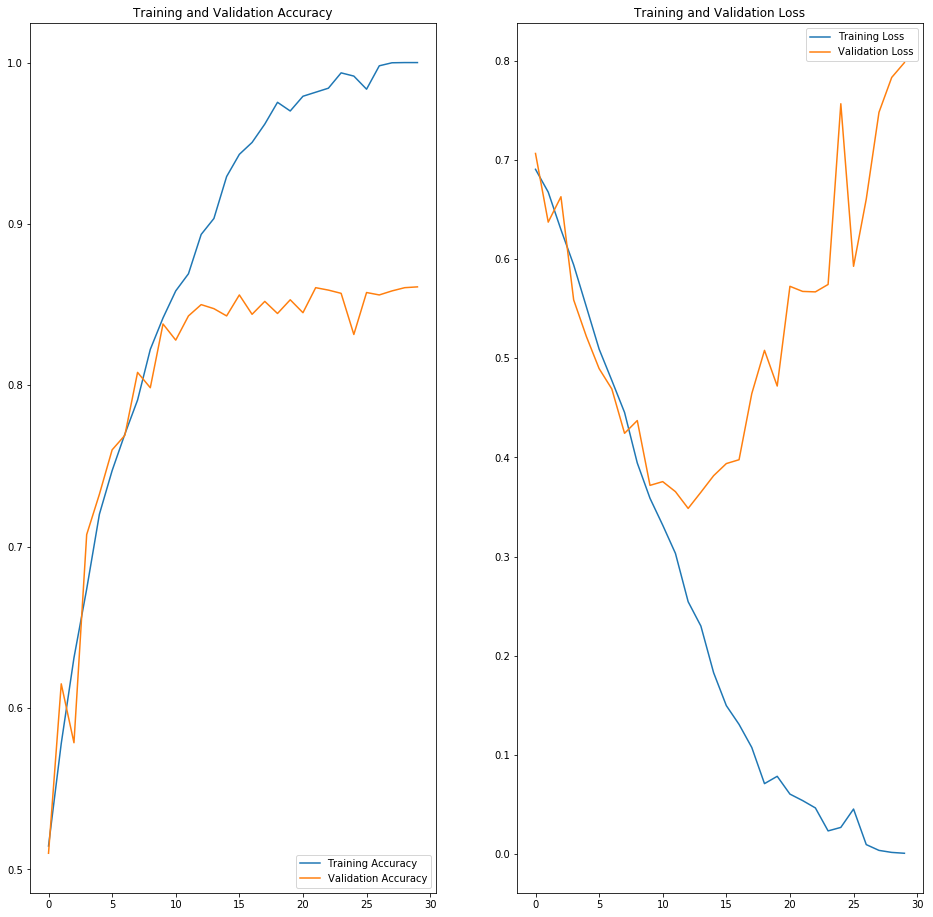

In [15]:
epochs_range = range(No_epoch)

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
from tensorflow.keras.models import load_model
import scipy.misc
from keras.preprocessing import image
from matplotlib import pyplot
from matplotlib.image import imread

In [17]:
m = load_model("cat_dog_classifier.h5")

Input image shape: (1, 200, 200, 3)
it is a dog


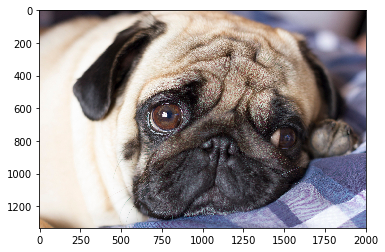

In [18]:
img_path = '/kaggle/input/test-image/test dog.jpg'
#img_path = '/kaggle/input/dogs-cats-images/dataset/test_set/cats/cat.4015.jpg'
img = image.load_img(img_path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0
print('Input image shape:', x.shape)
image = imread(img_path)
pyplot.imshow(image)
prediction = m.predict(x)
if prediction >= 0.75:
    print("it is a dog")
else:
    print("it is not a dog")  